In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from tqdm import tqdm

from copy import deepcopy

import flamedisx as fd
import tensorflow as tf

/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [2]:
def get_crossing(x, y, crit_val=19.5):
    crossing_points = np.argwhere(np.diff(np.sign(y - np.ones_like(y) * crit_val)) < 0.).flatten()
    
    try:
        x_left = x[crossing_points[-1]]
        x_right = x[crossing_points[-1] + 1]
        y_left = y[crossing_points[-1]]
        y_right = y[crossing_points[-1] + 1]
    except:
        return x[-1]
    
    gradient = (y_right - y_left) / (x_right - x_left)

    return (crit_val - y_left) / gradient + x_left

In [3]:
files_titles = {'outputs/CEvNS_disco/defn_2/lngs_good_low.pkl': 'LNGS, good, low contaminants',
                'outputs/CEvNS_disco/defn_2/lngs_good_high.pkl': 'LNGS, good, high contaminants',
                'outputs/CEvNS_disco/defn_2/lngs_bad_low.pkl': 'LNGS, bad, low contaminants',
                'outputs/CEvNS_disco/defn_2/lngs_bad_high.pkl': 'LNGS, bad, high contaminants',
                'outputs/CEvNS_disco/defn_2/surf_good_low.pkl': 'SURF, good, low contaminants',
                'outputs/CEvNS_disco/defn_2/surf_good_high.pkl': 'SURF, good, high contaminants',
                'outputs/CEvNS_disco/defn_2/surf_bad_low.pkl': 'SURF, bad, low contaminants',
                'outputs/CEvNS_disco/defn_2/surf_bad_high.pkl': 'SURF, bad, high contaminants'}

In [4]:
def produce_plot(file, title):
    plt.figure()
    
    result = pkl.load(open(file, 'rb'))
    exposures = result['exposures']
    medians = result['median_sys_uncs']
    crossing = get_crossing(exposures, medians)

    plt.plot(exposures, medians, color='k', linewidth=2)

    plt.hlines(19.5, np.min(exposures), np.max(exposures), color='darkred', linestyle='--', linewidth=1)
    plt.text(np.min(exposures), 20., 'CEvNS sys. uncertainty', color='darkred')

    plt.xlabel("Exposure [ty]")
    plt.ylabel("Median CEvNS stat. uncertainty [%]")
    plt.title(f"{title}: {crossing:.2f} ty")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)
    
    plt.ylim (15., 30.)

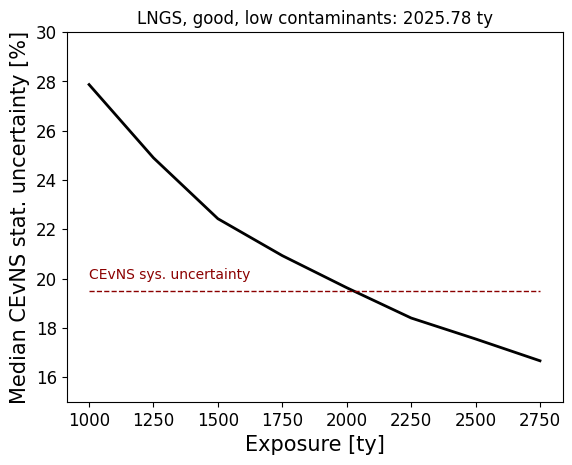

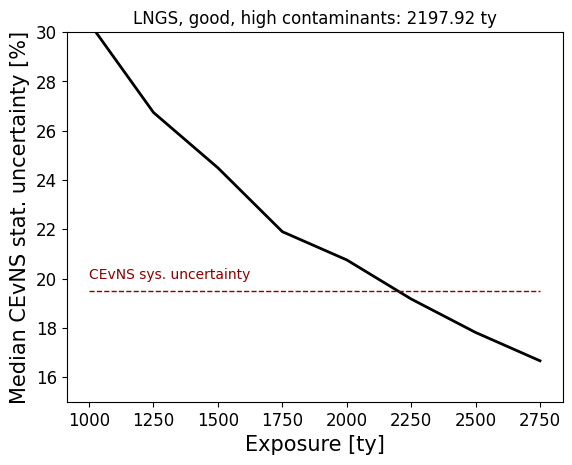

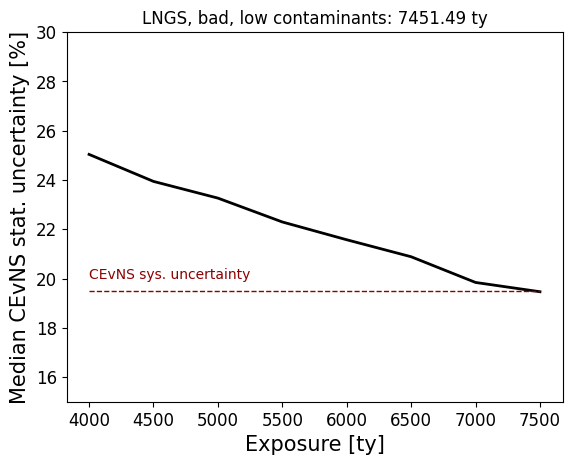

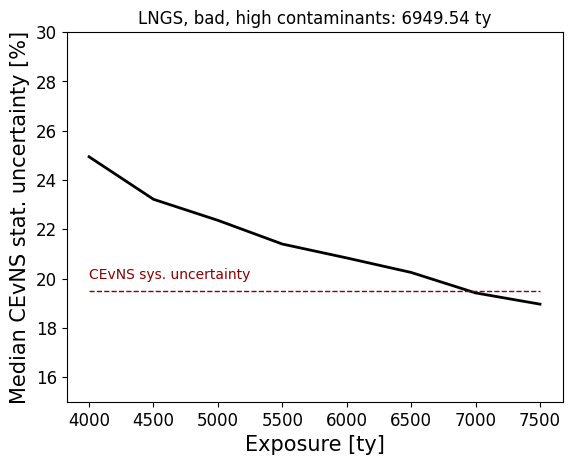

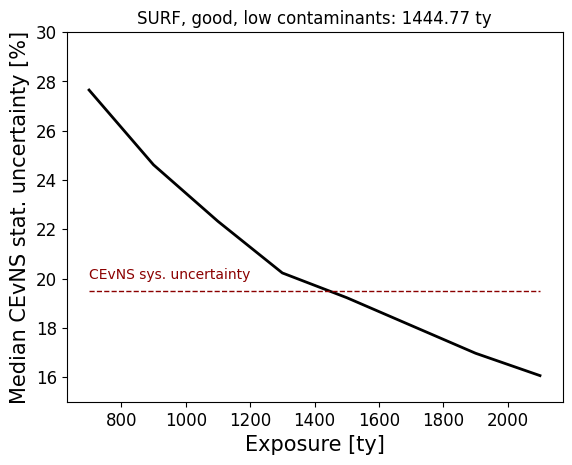

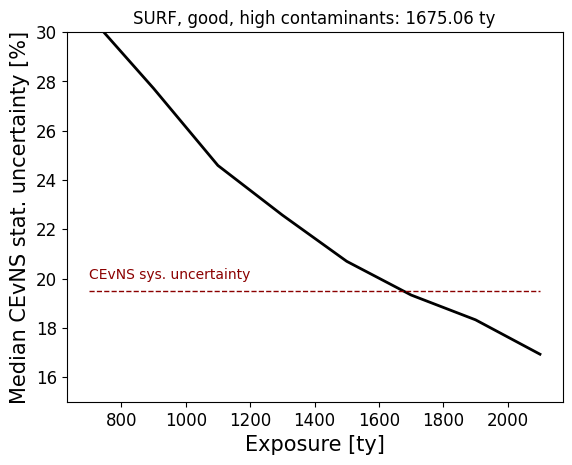

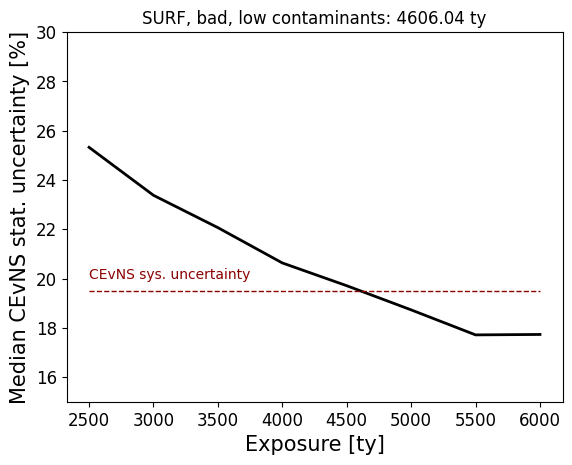

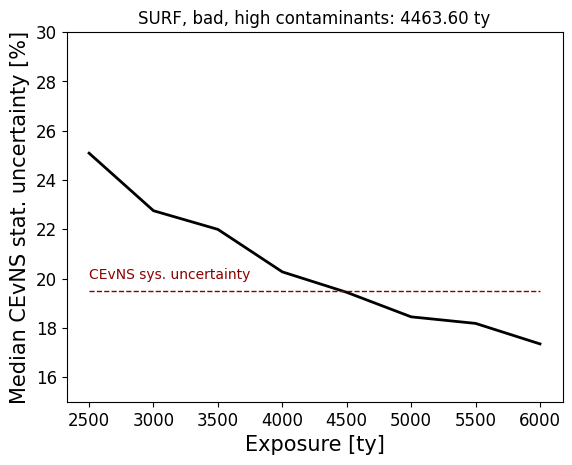

In [5]:
for file, title in files_titles.items():
    produce_plot(file, title)